## <center>Home Assignment #3</center>

### <center>Student: *Ivanova Polina*</center>

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import networkx as nx
%matplotlib inline
import scipy.io
from operator import itemgetter
import pandas as pd

## Problems
### Task 1
Compute degree centrality, Pagerank and HubAuthorities scores for the flickr network.

Data contains sparse matrix A and list of user names. This is a “denser” part of the Flickr photo sharing site friendship graph from 2006. Edge direction corresponds to friendship requests (following). Some of the links are reciprocal,others not.

Provide top 50 names in each ranking, compare results

In [2]:
data = scipy.io.loadmat('flickr.mat')
print data.keys()

['A', '__version__', 'names', '__header__', '__globals__']


In [3]:
G = nx.from_scipy_sparse_matrix(data['A'], create_using = nx.DiGraph())
n = len(G.nodes())
nx.relabel_nodes(G, mapping = dict(zip(list(range(n)), data['names'])), copy = False)

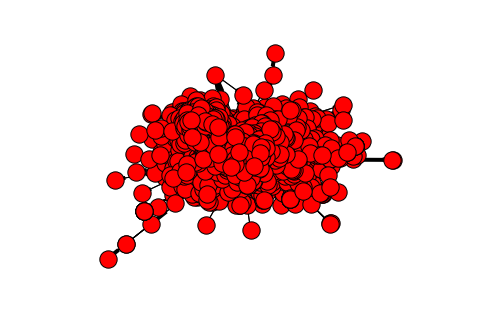

In [5]:
nx.draw(G)

In [4]:
degr_centrality = nx.degree_centrality(G)
pagerank_centrality = nx.pagerank(G)#, alpha=0.9)
hubs_centrality, aut_centrality = nx.hits(G)

In [5]:
cols = ['User name', 'Rank']
top50_degree = pd.DataFrame(sorted(degr_centrality.items(), key=itemgetter(1), reverse=True)[:50], columns = cols)
top50_pagerank = pd.DataFrame(sorted(pagerank_centrality.items(), key=itemgetter(1), reverse=True)[:50], columns = cols)
top50_hubs = pd.DataFrame(sorted(hubs_centrality.items(), key=itemgetter(1), reverse=True)[:50], columns = cols)
top50_authorities = pd.DataFrame(sorted(aut_centrality.items(), key=itemgetter(1), reverse=True)[:50], columns = cols)

Results of various ranking are showned below

In [8]:
frames=[top50_degree['User name'],top50_pagerank['User name'],top50_hubs['User name'],top50_authorities['User name']]
top50_all = pd.concat(frames, axis = 1, ignore_index=True)
top50_all.columns =['Degree', 'Page_rank', 'Hubs','Authorities']

print top50_all

                                               Degree  \
0   awfulsara                                     ...   
1   drp                                           ...   
2   DrJoanne                                      ...   
3   antimethod                                    ...   
4   *Ivan*                                        ...   
5   BombDog                                       ...   
6   deborah lattimore                             ...   
7   Simon Pais                                    ...   
8   cymagen                                       ...   
9   notraces                                      ...   
10  MaD GiÂ®Lâ¢â¢                               ...   
11  aleyna                                        ...   
12  *starlet*                                     ...   
13  lorrainemd                                    ...   
14  Pandarine                                     ...   
15  :Nikola                                       ...   
16  artofgold                  

To compare together methods we can look at nodes which are on the top for all of them. 

I must just note that it will be more correctly to compare degree centrality and page rank with authorities more than with hubs, because authorities scores take into account in-neighbours. (And really Hubs top-list significantly differs from other)

Degree centrality, Page Rank and Authorities are common in many respects, especially in the first places.

In [9]:
index_degree = pd.DataFrame(list(xrange(1,51)), index = [s.replace(' ', '') for s in list(top50_degree['User name'])])
index_pagerank = pd.DataFrame(list(xrange(1,51)), index = [s.replace(' ', '') for s in list(top50_pagerank ['User name'])])
index_authorities = pd.DataFrame(list(xrange(1,51)), index = [s.replace(' ', '') for s in list(top50_authorities['User name'])])

frames = [index_degree, index_pagerank, index_authorities]
top50_compare = pd.concat(frames, axis=1, join='inner')

top50_compare.columns =['Degree', 'Page_rank', 'Authorities']
print top50_compare

                    Degree  Page_rank  Authorities
awfulsara                1          1            1
drp                      2          2            2
DrJoanne                 3          7            3
*Ivan*                   5          5            4
antimethod               4          3            5
BombDog                  6          4            6
SimonPais                8          8            7
deborahlattimore         7          9            8
cymagen                  9         10            9
:Nikola                 16         11           10
lorrainemd              14         14           11
*starlet*               13         18           12
aleyna                  12         25           13
artofgold               17         16           14
notraces                10         12           15
romanlily               23         17           16
Pandarine               15         19           17
Mylens                  20         24           18
MareenFischinger        18     

In [10]:
index_hubs = pd.DataFrame(list(xrange(1,51)), index = [s.replace(' ', '') for s in list(top50_hubs['User name'])])

frames =  [index_degree, index_pagerank, index_authorities, index_hubs]
top50_whubs = pd.concat(frames, axis=1, join='inner')

top50_whubs.columns =['Degree', 'Page_rank', 'Authorities', 'Hubs']
print top50_whubs

                    Degree  Page_rank  Authorities  Hubs
lorrainemd              14         14           11     4
*starlet*               13         18           12     6
cymagen                  9         10            9    16
DrJoanne                 3          7            3    18
drp                      2          2            2    24
bernardo.borghetti      21         34           20    32
notraces                10         12           15    33
MareenFischinger        18         21           19    47
.lush                   32         48           24    49
naftalina007            31         44           31    50


### <hr />  Task 2
Here are the Facebook friendship graphs from several US universities from 2005 (one year after fb launch).

Data contains a A matrix (sparse) and a "local_info" variable, one row per node: a student/faculty status flag, gender, major, second major/minor (if applicable), dorm/house, year, and high school. Missing data is coded 0.

Compute node degree assortativity (mixining by node degree) and assortativity coefficient (modularity) for gender, major, dormitory, year, high school for all universities and compare the results.

In [2]:
Berkeley = scipy.io.loadmat('./universities/Berkeley13.mat')
Caltech = scipy.io.loadmat('./universities/Caltech36.mat')
Harvard = scipy.io.loadmat('./universities/Harvard1.mat')
Oklahoma = scipy.io.loadmat('./universities/Oklahoma97.mat')
Princeton = scipy.io.loadmat('./universities/Princeton12.mat')
Texas= scipy.io.loadmat('./universities/Texas80.mat')

In [12]:
print 'Berkeley ', Berkeley['A'].shape
print 'Caltech ', Caltech['A'].shape
print 'Harvard ', Harvard['A'].shape
print 'Oklahoma ', Oklahoma['A'].shape
print 'Princeton ', Caltech['A'].shape
print 'Texas ', Texas['A'].shape

Berkeley  (22937, 22937)
Caltech  (769, 769)
Harvard  (15126, 15126)
Oklahoma  (17425, 17425)
Princeton  (769, 769)
Texas  (31560, 31560)


#### Berkeley University

The most higher assortative coefficient is belongs to year attribute, but it not quit big anyway. So we can say about disassortativity of this graph.

In [3]:
G_berkeley = nx.from_scipy_sparse_matrix(Berkeley['A'], create_using = nx.DiGraph())

def assortativity_coefficients(data_university, G_university):
    atts_name = ['gender', 'major', 'dorm', 'year', 'high_school']
    atts_number = [1, 2, 4, 5, 6]
    n = len(G_university.nodes())
    assort_coeffs = {x: 0 for x in ['degree'] + atts_name}
    assort_coeffs['degree'] = nx.degree_assortativity_coefficient(G_university)
    for i in xrange(5):
        current = {j: data_university['local_info'][j][atts_number[i]] for j in xrange(n)}
        nx.set_node_attributes(G_university, atts_name[i], current)
        assort_coeffs[atts_name[i]] = nx.attribute_assortativity_coefficient(G_university, atts_name[i])
    
    return assort_coeffs, atts_name

In [14]:
assort_berkeley, atts_name = assortativity_coefficients(Berkeley, G_berkeley)
for name in ['degree'] + atts_name:
    print name, assort_berkeley[name]


degree 0.0103134590889
gender 0.0409228376393
major 0.058255029946
dorm 0.14727644076
year 0.308121015806
high_school 0.0773753653543


#### Caltech University

For dormitories and year attributes we obtain the highest modularities: approximately equal to 0.34 and 0.23 respectively. Wemay have some structure but it not well-defined.

With regard to other categories network is unambiguously disassortative. And mixing by degree is approximately equals to zero.

In [15]:
G_caltech = nx.from_scipy_sparse_matrix(Caltech['A'], create_using = nx.DiGraph())
assort_caltech, atts_name = assortativity_coefficients(Caltech, G_caltech)
for name in ['degree'] + atts_name:
    print name, assort_caltech[name]

degree -0.0652729511948
gender 0.0463314364559
major 0.0347194237236
dorm 0.349153100873
year 0.237531904813
high_school 0.00266977930658


#### Harvard University

For this university mixing by node degree is higher than for another universities, but it still not quite big to talk about strong assortativity of network.

The highest categorical assortative coefficient we again obtain from year attribute.

In [16]:
G_harvard = nx.from_scipy_sparse_matrix(Harvard['A'], create_using = nx.DiGraph())
assort_harvard, atts_name = assortativity_coefficients(Harvard, G_harvard)
for name in ['degree'] + atts_name:
    print name, assort_harvard[name]

degree 0.145054887671
gender 0.0452699773794
major 0.0496769283286
dorm 0.12567663505
year 0.421159642116
high_school 0.0239867253741


#### Oklahoma University

As for previous universities we obtain that for dormitory and year attribute coefficients are the highest ones, but still small.

In [7]:
G_oklahoma = nx.from_scipy_sparse_matrix(Oklahoma['A'], create_using = nx.DiGraph())
assort_oklahoma, atts_name = assortativity_coefficients(Oklahoma, G_oklahoma)
for name in ['degree'] + atts_name:
    print name, assort_oklahoma[name]

degree 0.0736732579392
gender 0.0928372959827
major 0.0363790887617
dorm 0.280335243729
year 0.20116469147
high_school 0.139468406924


#### Princeton University

For year attribute assortative coefficient is the highest and for this value ($\approx 0.45$) we can observe well-marked blocks at network.

In [8]:
G_princeton = nx.from_scipy_sparse_matrix(Princeton['A'], create_using = nx.DiGraph())
assort_princeton, atts_name = assortativity_coefficients(Princeton, G_princeton)
for name in ['degree'] + atts_name:
    print name, assort_princeton[name]

degree 0.091092123568
gender 0.0506107399953
major 0.0543901188714
dorm 0.0946784195542
year 0.446744620584
high_school 0.018783655245


#### Texas University

For this university only gender and major attributes provide approximately zero assortative coefficient. For other attributes and foe node degrees coefficients are not quite big, but greater than 0.1 (we may say greater than 0.15), so most likely that tendency "attributed of connected nodes tend to be more similar than if there were no such edge" is observed.

In [4]:
G_texas = nx.from_scipy_sparse_matrix(Texas['A'], create_using = nx.DiGraph())

In [5]:
assort_texas, atts_name = assortativity_coefficients(Texas, G_texas)
for name in ['degree'] + atts_name:
    print name, assort_texas[name]

degree 0.163892412814
gender 0.0796930681412
major 0.0597127278334
dorm 0.204837604339
year 0.246194684162
high_school 0.147992848231
